Original: Keeps all data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

In [42]:
df = pd.read_csv("data/raw/Media-Matrix-Combined-v2.csv")

In [43]:
#df.isnull().sum() # count of nan
#df.duplicated().sum() # count duplicate rows
#df.nunique() # count unique value per column


In [44]:
# remove pubchemid column
df = df.drop(df.columns[1], axis=1)

# set index to compound names
df.set_index(df.columns[0], inplace=True)

In [45]:
df.describe()

,1_YAR,2a_YAR,2b_YAR,2c_YAR,2d_YAR,3a_YAR,3b_YAR,3c_YAR,4_YAR,5_YAR,...,5b_CER,1a_PIC,1b_PIC,1c_PIC,1d_PIC,2a_PIC,3a_PIC,3b_PIC,4a_PIC,4b_PIC
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.550854,0.460438,0.460438,0.863663,0.460438,0.383082,0.734142,0.874496,1.428868,0.869441,...,1.277367,0.421582,0.421861,0.760160,0.219480,1.974876,0.460597,11.841701,1.473548,1.136774
std,2.120593,2.627429,2.627429,5.744568,1.903863,2.548492,3.236155,3.175141,10.168796,5.189484,...,7.782533,1.627032,1.627525,3.456583,1.018536,12.253811,2.627402,92.702140,6.742219,5.934587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000172,0.000375,0.000375,0.000375,0.000475,0.000000,0.000000,0.000004,0.000750,0.000752,...,0.003531,0.000650,0.000000,0.000000,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000
max,12.930000,20.000000,20.000000,45.000000,10.000000,20.000000,20.000000,20.000000,80.000000,40.000000,...,60.000000,10.000000,10.000000,22.695000,7.230000,95.200000,20.000000,730.000000,45.200000,45.200000


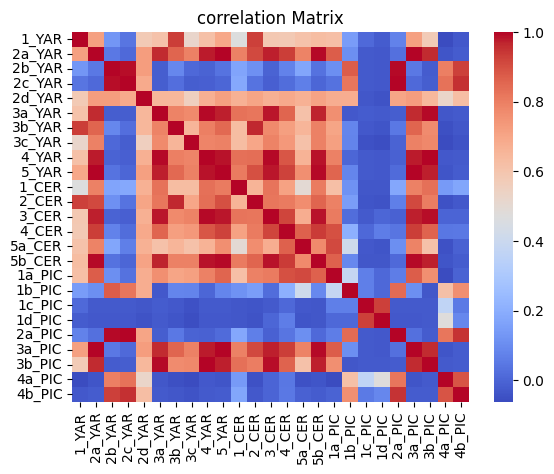

In [46]:
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("correlation Matrix")
plt.show()

In [47]:
#sns.pairplot(df)

In [48]:
# it could be useful to visualize only a subset of columns

'''
subset_cols = ['Exp_1', 'Exp_2', 'Exp_3', 'Exp_4']
sns.pairplot(df[subset_cols])
plt.show()
'''

"\nsubset_cols = ['Exp_1', 'Exp_2', 'Exp_3', 'Exp_4']\nsns.pairplot(df[subset_cols])\nplt.show()\n"

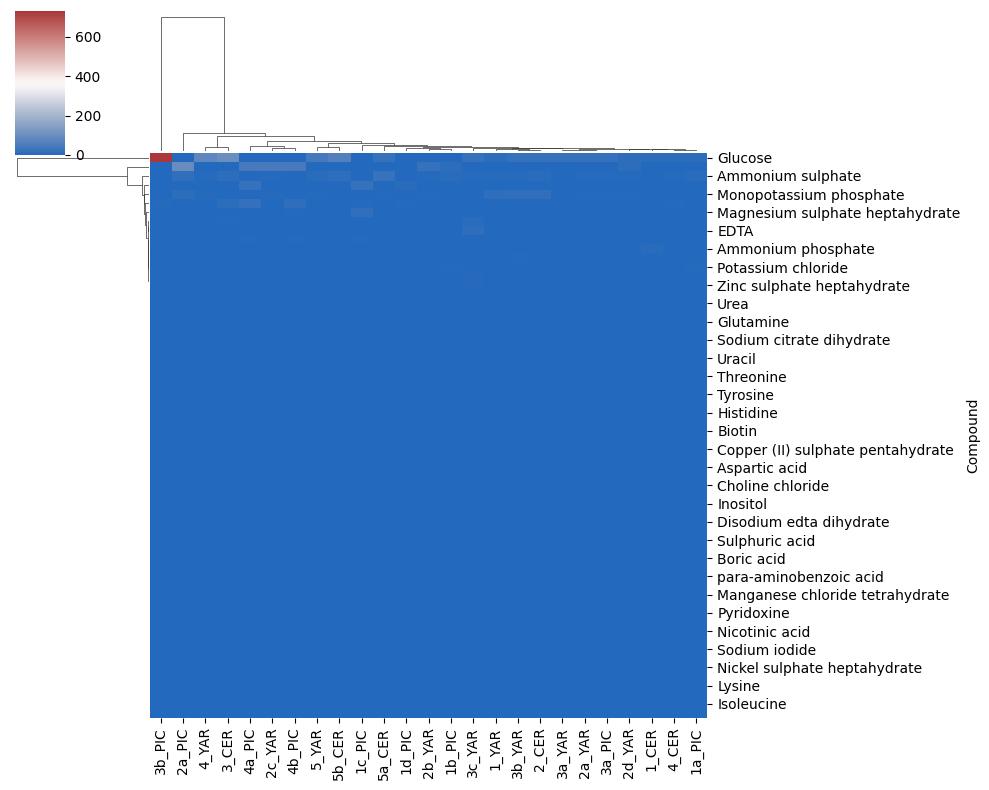

In [49]:
sns.clustermap(df, cmap='vlag', metric='euclidean', figsize=(10, 8))


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), 
                         columns=df.columns,
                         index=df.index)


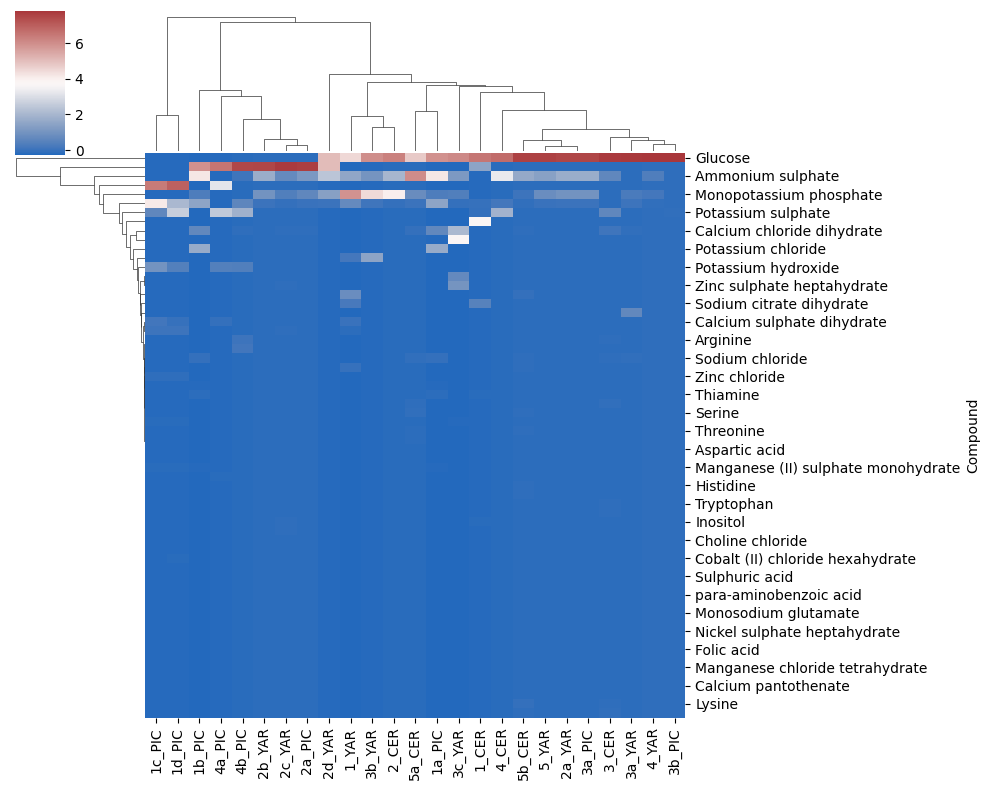

In [51]:
sns.clustermap(df_scaled, cmap='vlag', metric='euclidean', figsize=(10, 8))

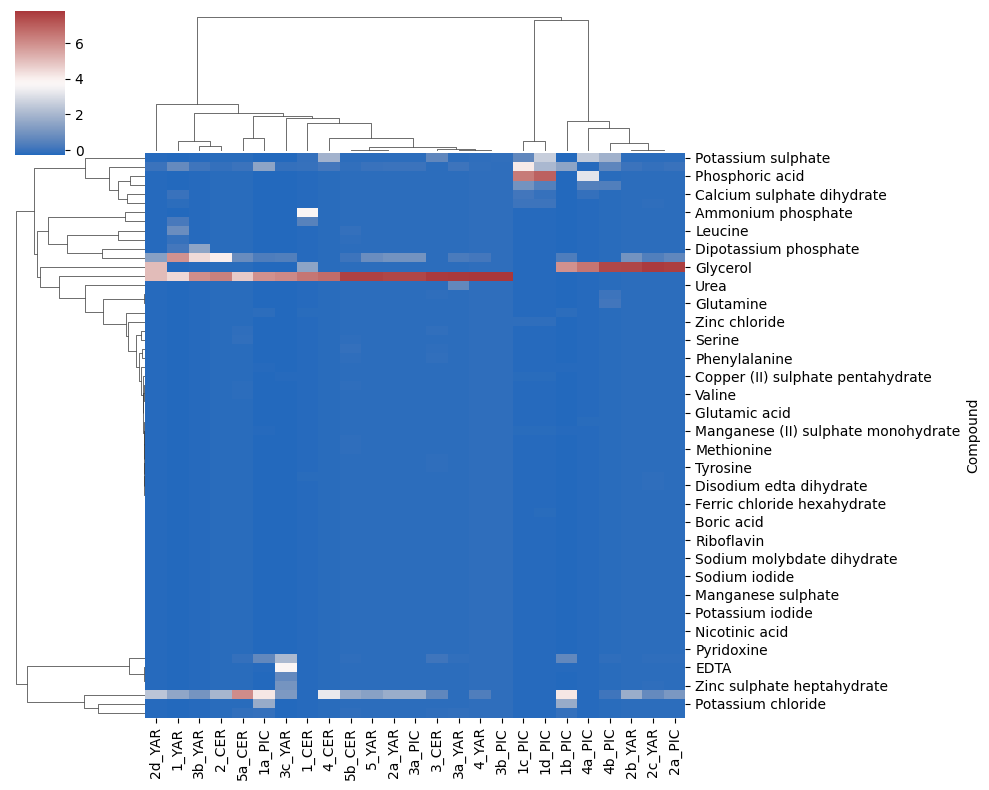

In [52]:
sns.clustermap(df_scaled, cmap='vlag', metric='correlation', figsize=(10, 8))

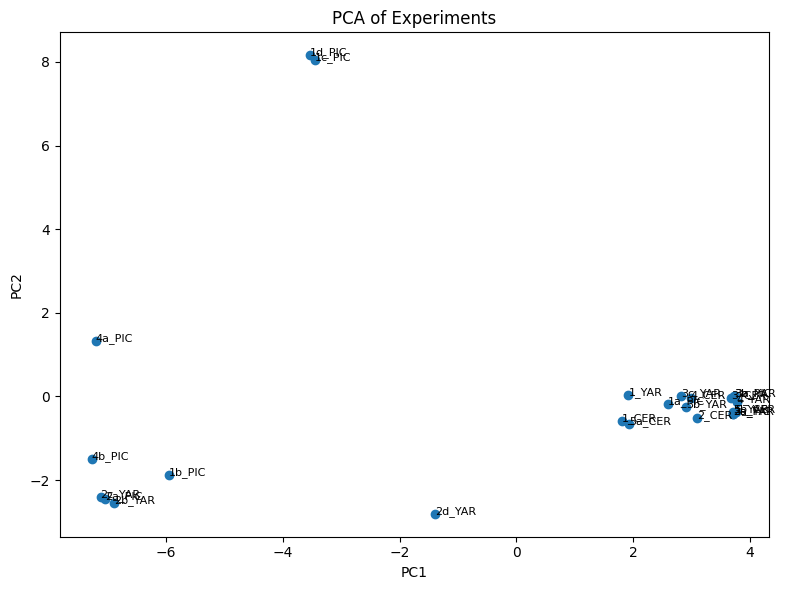

Explained variance ratio: [0.56775864 0.19836011 0.08931114 0.06532527 0.02729789]


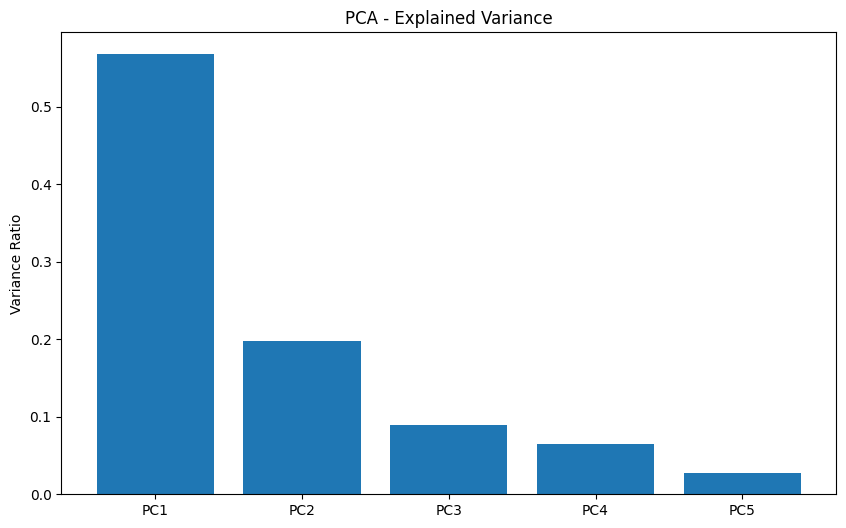

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Transpose to analyze experiments (columns become rows)
pca = PCA(n_components=5)  # Get 5 PCs so you can plot variance later
pca_result = pca.fit_transform(df_scaled.T)

# Scatter plot for first 2 PCs
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA of Experiments")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Label each experiment (column name)
for i, name in enumerate(df_scaled.columns):
    plt.text(pca_result[i, 0], pca_result[i, 1], str(name), fontsize=8)

plt.tight_layout()
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Bar plot of variance explained by first 5 PCs
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), pca.explained_variance_ratio_, tick_label=[f"PC{i}" for i in range(1, 6)])
plt.title("PCA - Explained Variance")
plt.ylabel("Variance Ratio")
plt.show()


[Text(1, 0, 'Glucose'),
 Text(1, 1, 'Glycerol'),
 Text(1, 2, 'Ammonium sulphate'),
 Text(1, 3, 'Phosphoric acid'),
 Text(1, 4, 'Monopotassium phosphate'),
 Text(1, 5, 'Magnesium sulphate heptahydrate'),
 Text(1, 6, 'Potassium sulphate'),
 Text(1, 7, 'Ammonium phosphate'),
 Text(1, 8, 'Calcium chloride dihydrate'),
 Text(1, 9, 'EDTA'),
 Text(1, 10, 'Potassium chloride'),
 Text(1, 11, 'Dipotassium phosphate'),
 Text(1, 12, 'Potassium hydroxide'),
 Text(1, 13, 'Sodium phosphate'),
 Text(1, 14, 'Zinc sulphate heptahydrate'),
 Text(1, 15, 'Leucine'),
 Text(1, 16, 'Sodium citrate dihydrate'),
 Text(1, 17, 'Urea'),
 Text(1, 18, 'Calcium sulphate dihydrate'),
 Text(1, 19, 'Iron sulphate heptahydrate'),
 Text(1, 20, 'Arginine'),
 Text(1, 21, 'Glutamine'),
 Text(1, 22, 'Sodium chloride'),
 Text(1, 23, 'Uracil'),
 Text(1, 24, 'Zinc chloride'),
 Text(1, 25, 'Ammonium iron (II) sulphate hexahydrate'),
 Text(1, 26, 'Thiamine'),
 Text(1, 27, 'Isoleucine'),
 Text(1, 28, 'Serine'),
 Text(1, 29, 'Copper

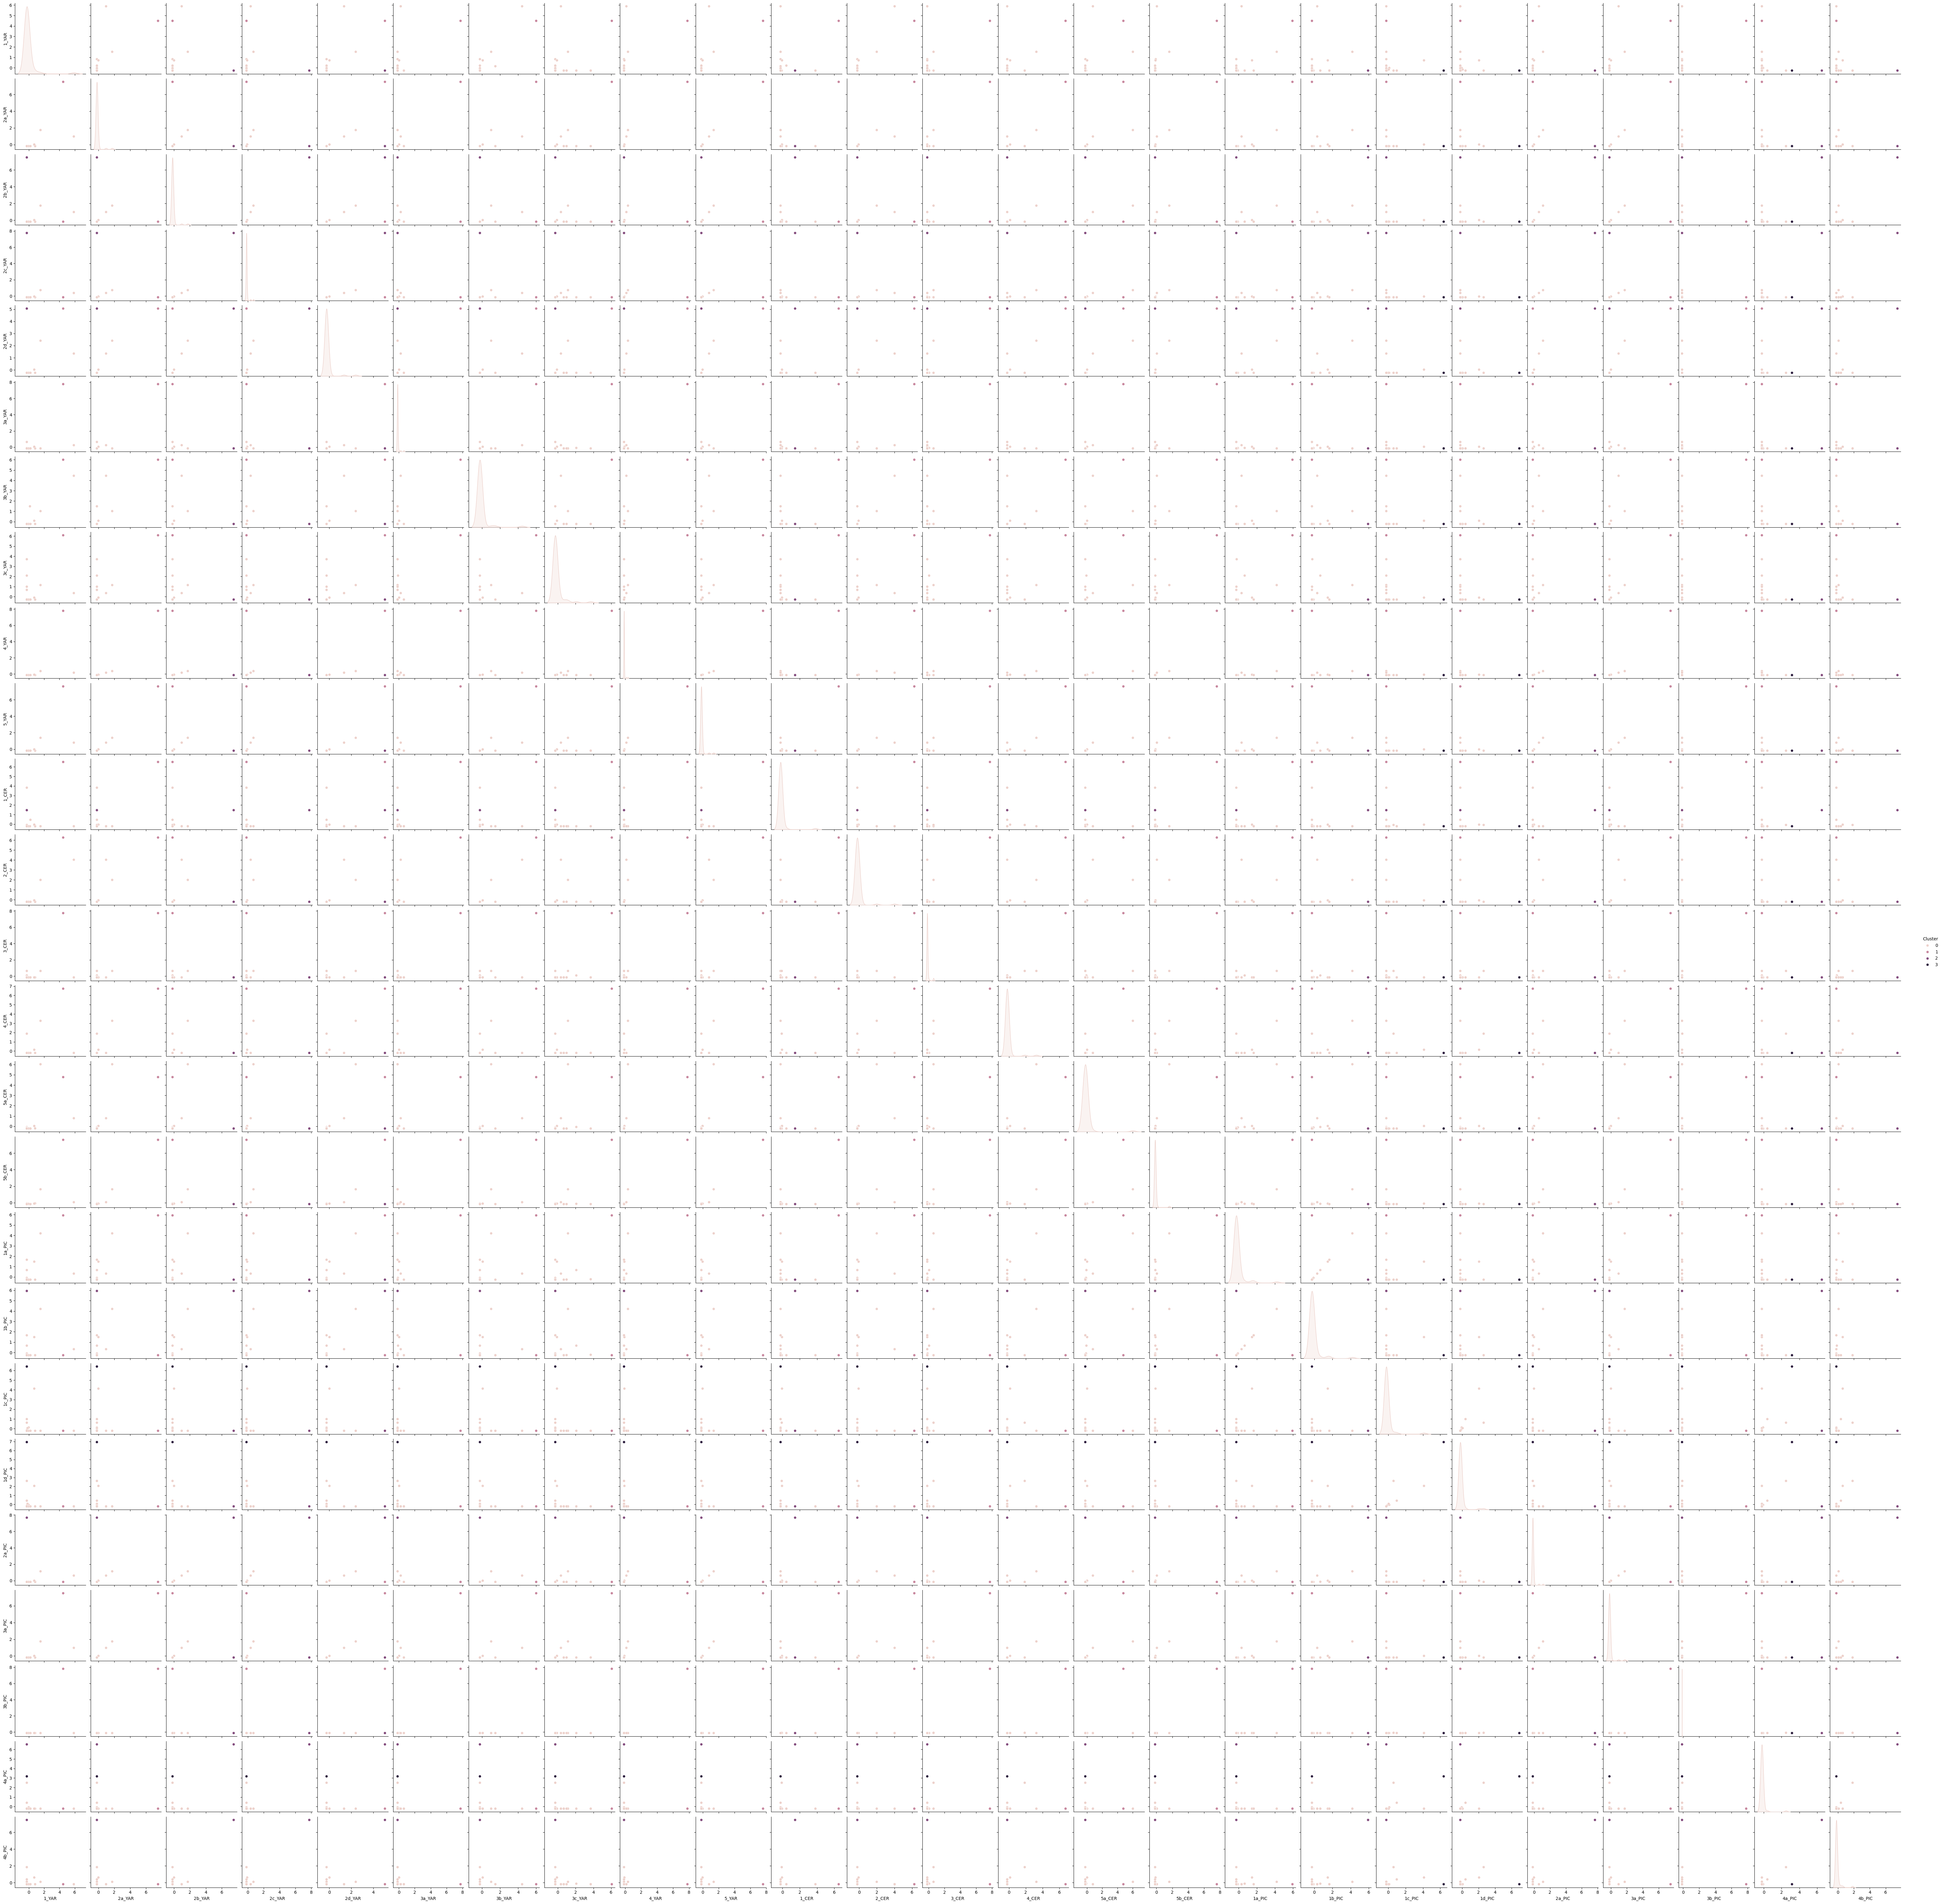

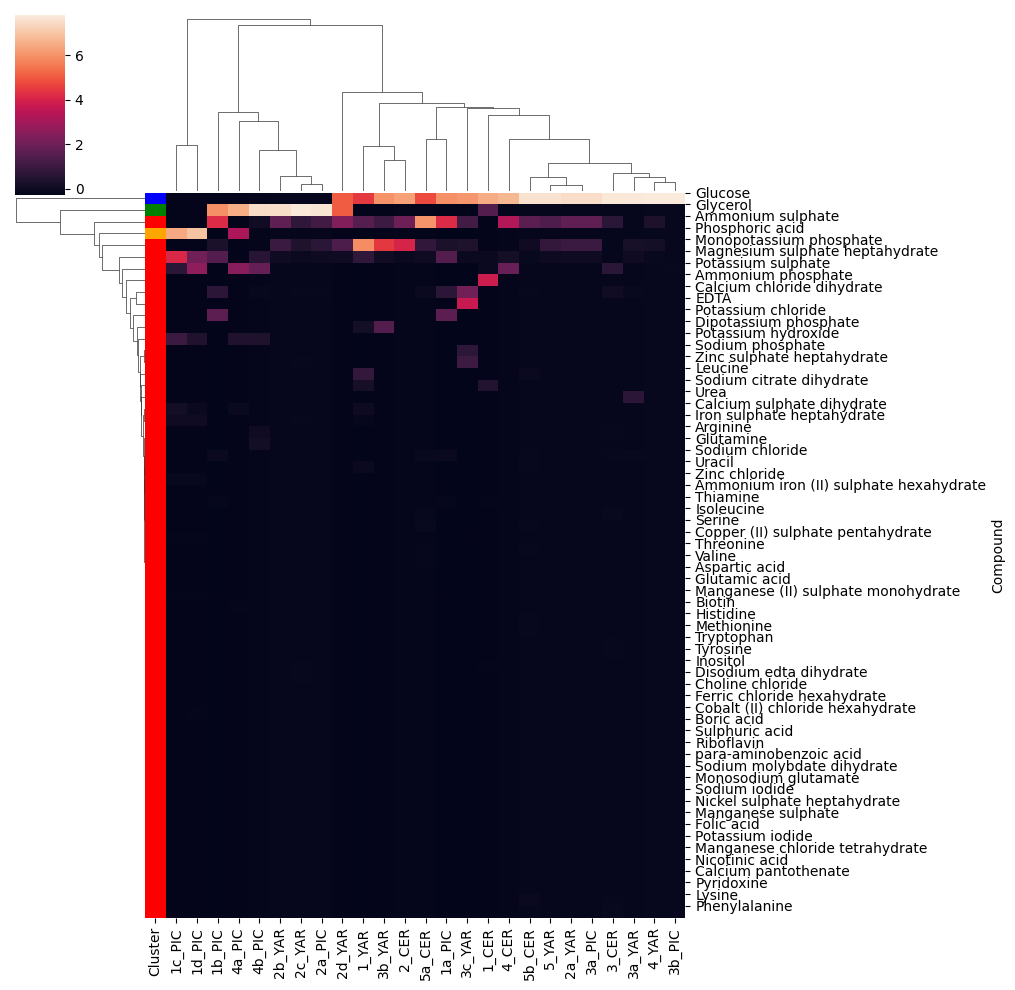

In [54]:
# this was unsuccessful as most clusters only had 1 sample. but might be useful when splitting experiments

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)  # Try 3–6
labels = kmeans.fit_predict(df_scaled)

# Add to your dataframe
df_scaled['Cluster'] = labels
import seaborn as sns
sns.pairplot(df_scaled, hue='Cluster')
g = sns.clustermap(df_scaled.drop('Cluster', axis=1), row_colors=df_scaled['Cluster'].map({0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}))

reordered_labels = g.data.index[g.dendrogram_row.reordered_ind]

g.ax_heatmap.set_yticks(np.arange(len(reordered_labels)))
g.ax_heatmap.set_yticklabels(reordered_labels, rotation = 0)
#g.fig.set_size_inches(18,20)

In [55]:
df_scaled.groupby('Cluster').mean()

# results below for the whole media set can be interpreted as:
# cluster 0 mostly around -0.1 baseline/weak response
# cluster 1 has some strong positive responses for certain conditions, looking above we can see a few pichia and yarrowia experiments light up in response to glucose
# cluster 2 has some strong positives in different sections to cluster 1, and above we can see there is a response to glycerel
# cluster 3 This seems to do with phosphoric acid from pichia experiments 1c and 1d 

,1_YAR,2a_YAR,2b_YAR,2c_YAR,2d_YAR,3a_YAR,3b_YAR,3c_YAR,4_YAR,5_YAR,...,5b_CER,1a_PIC,1b_PIC,1c_PIC,1d_PIC,2a_PIC,3a_PIC,3b_PIC,4a_PIC,4b_PIC
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.067263,-0.121087,-0.121087,-0.126148,-0.167106,-0.126393,-0.093975,-0.093514,-0.127228,-0.123120,...,-0.123324,-0.091740,-0.091703,-0.100919,-0.110248,-0.124491,-0.121085,-0.128011,-0.160882,-0.120325
1,4.492273,7.497471,-0.176673,-0.151572,5.051539,7.760298,6.001917,6.072685,7.789766,7.601912,...,7.607036,5.935107,-0.261320,-0.221712,-0.217245,-0.162480,7.497487,7.810186,-0.220340,-0.193114
2,-0.261885,-0.176673,7.497471,7.745863,5.051539,-0.151544,-0.228708,-0.277668,-0.141662,-0.168907,...,-0.165472,-0.261226,5.933138,-0.221712,-0.217245,7.669953,-0.176736,-0.128782,6.538413,7.485430
3,-0.261885,-0.176673,-0.176673,-0.151572,-0.243818,-0.151544,-0.228708,-0.277668,-0.141662,-0.168907,...,-0.165472,-0.261226,-0.261320,6.397619,6.939124,-0.162480,-0.176736,-0.128782,3.173989,-0.193114


In [56]:
compound_clusters = df_scaled['Cluster']
compound_clusters.value_counts()


Cluster
0    59
1     1
2     1
3     1
Name: count, dtype: int64

In [57]:
compounds_by_cluster = df.copy()
compounds_by_cluster['Cluster'] = compound_clusters


<Axes: title={'center': 'Mean Response per Condition by Cluster'}>

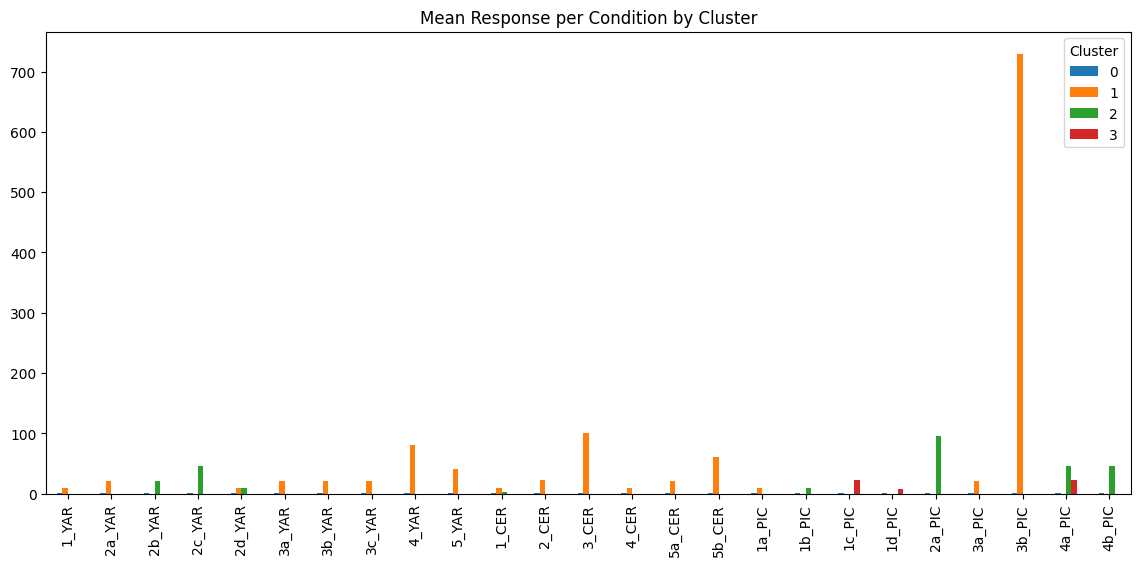

In [58]:
cluster_means = compounds_by_cluster.groupby('Cluster').mean()
cluster_means.T.plot(kind='bar', figsize=(14, 6), title="Mean Response per Condition by Cluster")


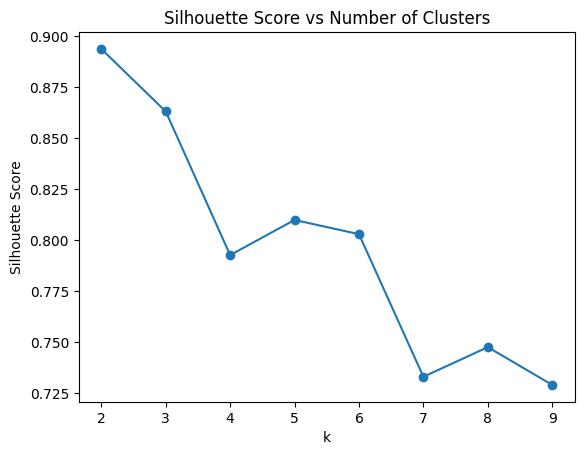

In [59]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled.drop('Cluster', axis=1))
    score = silhouette_score(df_scaled.drop('Cluster', axis=1), labels)
    scores.append(score)

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


In [60]:
outliers = df_scaled[df_scaled['Cluster'] != 0]
print(outliers.index)


Index(['Glucose', 'Glycerol', 'Phosphoric acid'], dtype='object', name='Compound')


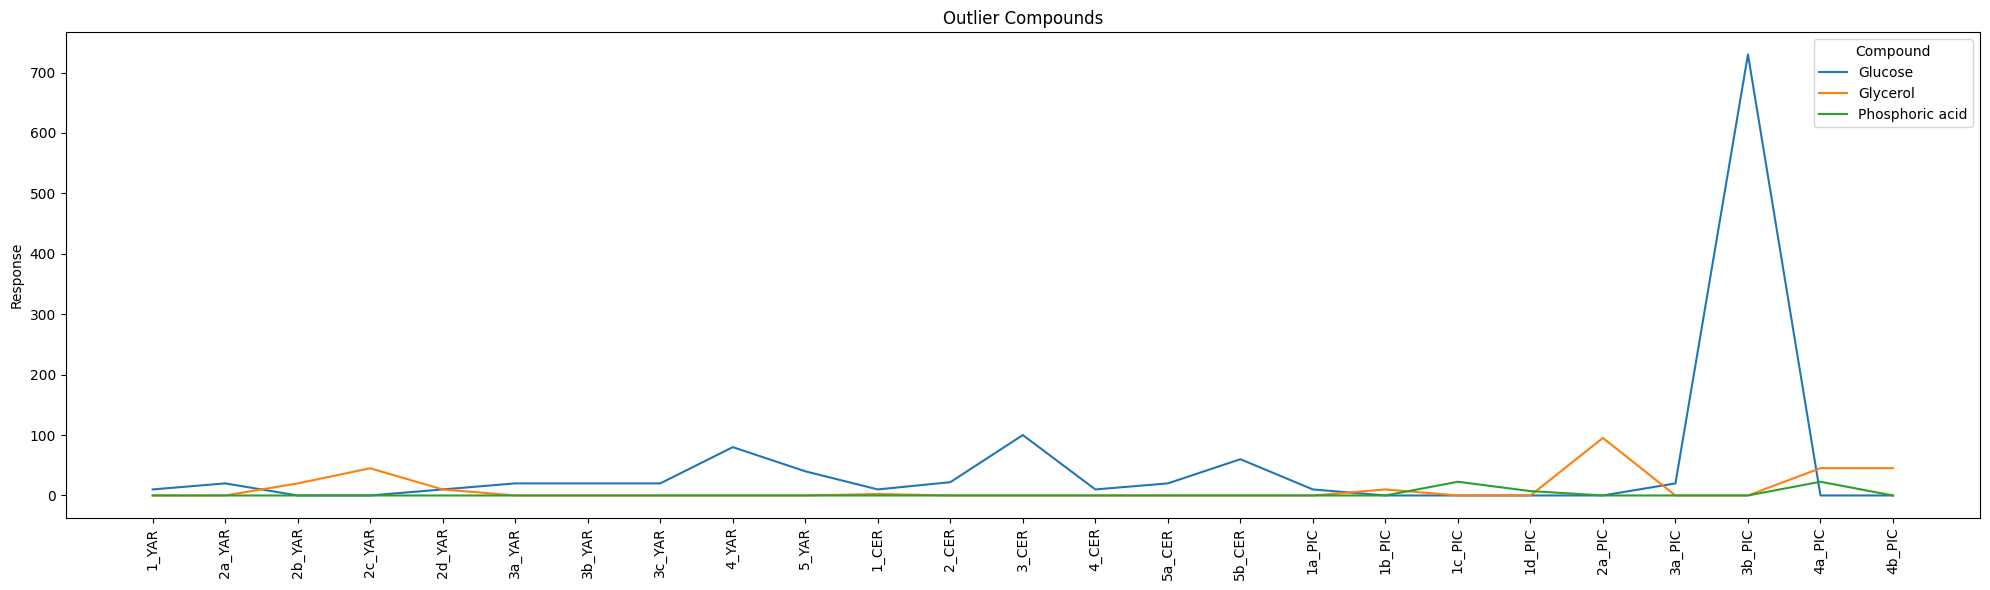

In [61]:
ax = df.loc[outliers.index].T.plot(figsize=(20, 6), title="Outlier Compounds", legend=True)

# Ensure every point is labeled on the x-axis
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)

plt.ylabel("Response")
plt.tight_layout()
plt.show()


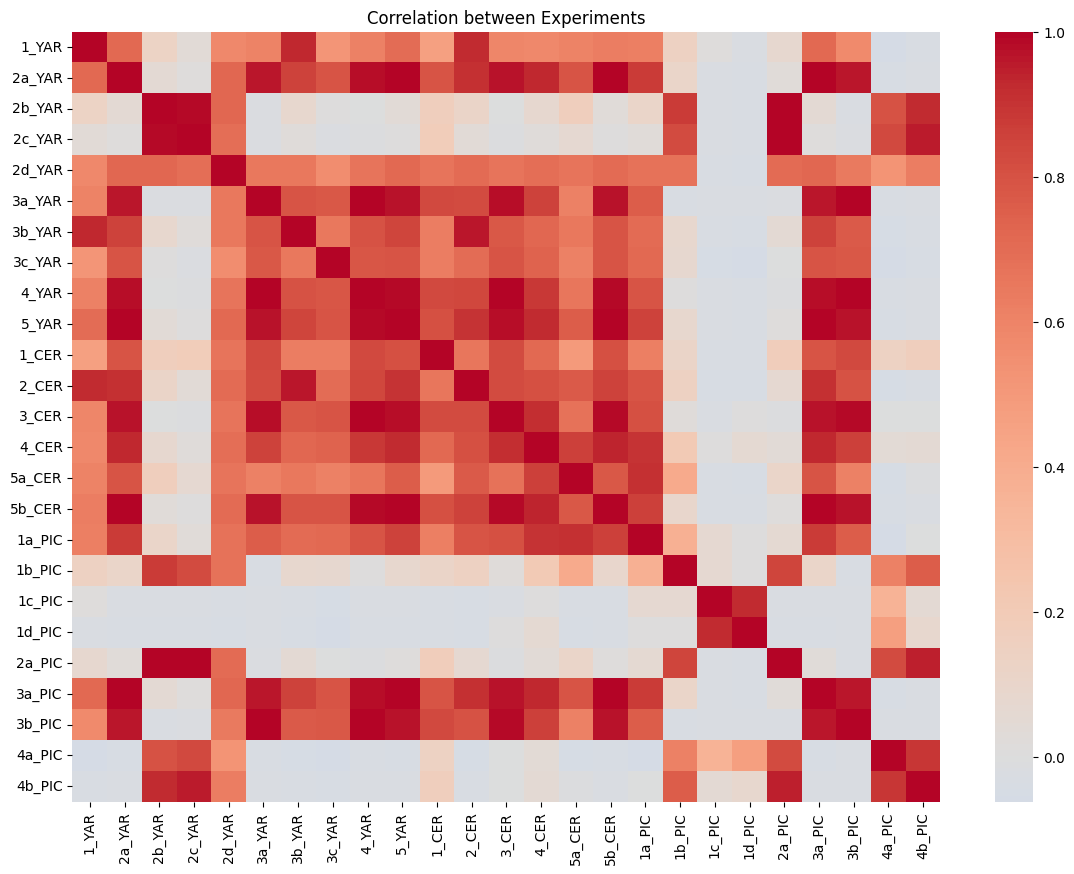

In [62]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Experiments")
plt.show()


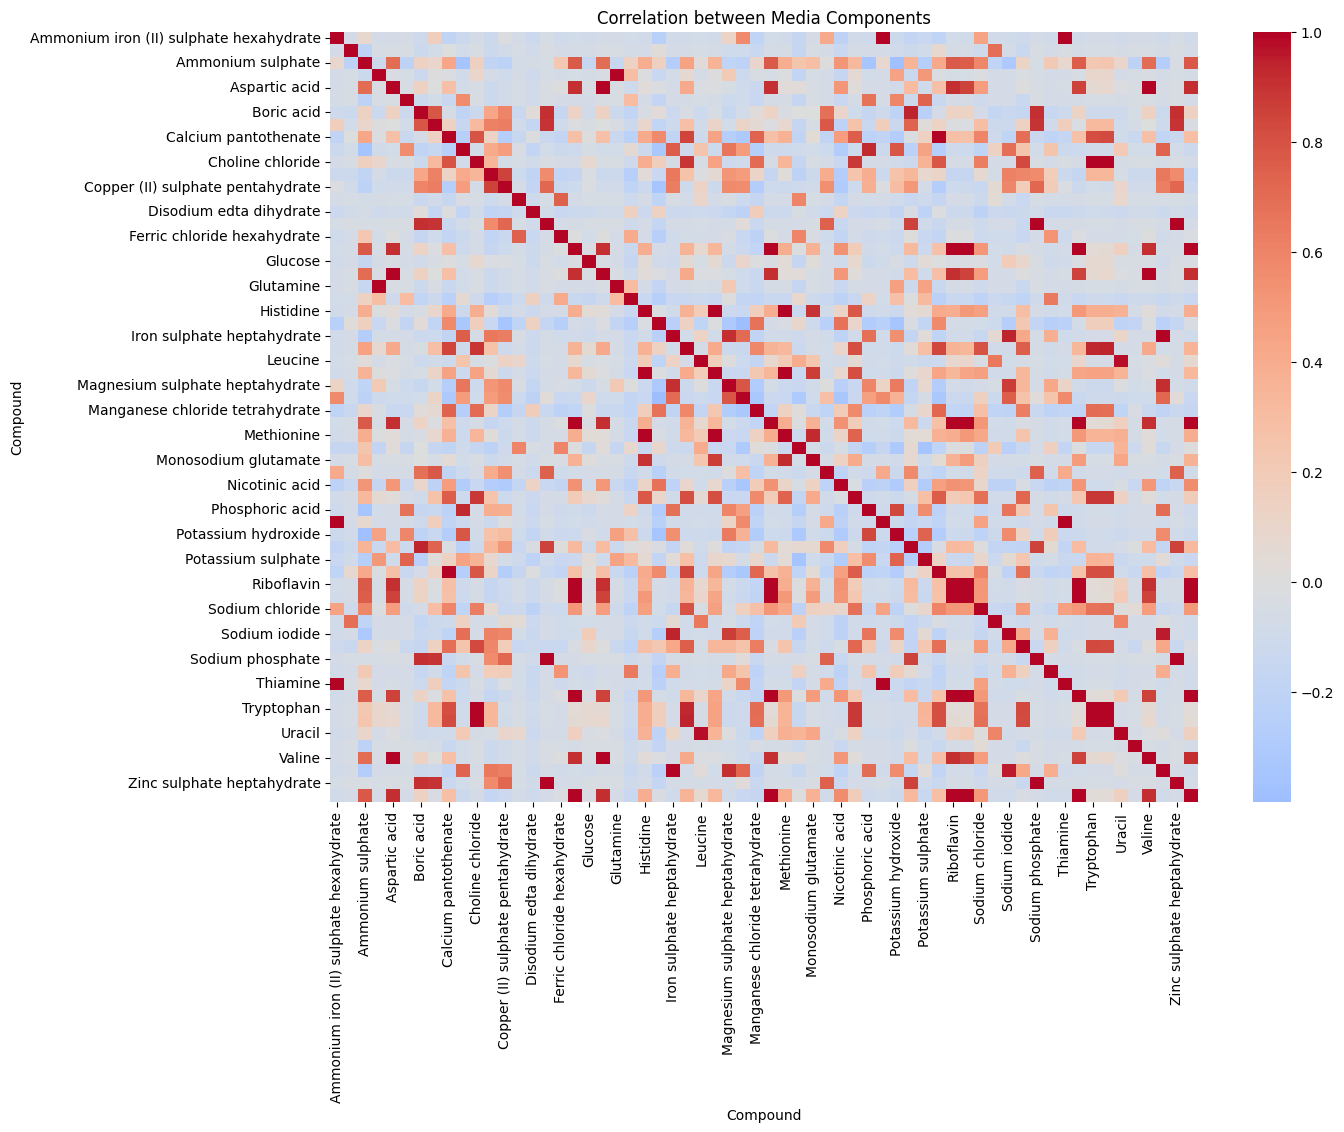

In [63]:
# this is good but is missing many labels
df_t = df.T

plt.figure(figsize=(14, 10))
sns.heatmap(df_t.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Media Components")
plt.show()

In [64]:
import numpy as np

ratio_matrix = {}

columns = df_t.columns
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i < j:
            ratio = df_t[col1] / (df_t[col2] + 1e-8)  # avoid divide-by-zero
            std_ratio = np.std(ratio)
            ratio_matrix[(col1, col2)] = std_ratio

# Find pairs with lowest std dev of ratio
sorted_ratios = sorted(ratio_matrix.items(), key=lambda x: x[1])
for (comp1, comp2), std in sorted_ratios[:10]:  # show top 10 stable ratios
    print(f"{comp1} / {comp2} --> std dev of ratio: {std:.4f}")


Folic acid / Glucose --> std dev of ratio: 0.0000
Folic acid / Monopotassium phosphate --> std dev of ratio: 0.0000
Folic acid / Magnesium sulphate heptahydrate --> std dev of ratio: 0.0000
Folic acid / Serine --> std dev of ratio: 0.0000
Folic acid / Sodium chloride --> std dev of ratio: 0.0000
Folic acid / Threonine --> std dev of ratio: 0.0000
Folic acid / Leucine --> std dev of ratio: 0.0000
Folic acid / Phenylalanine --> std dev of ratio: 0.0000
Folic acid / Lysine --> std dev of ratio: 0.0001
Folic acid / Histidine --> std dev of ratio: 0.0001


In [65]:
# this yields same results whether scaled or not
import itertools

ratios = {}
cols = df_t.columns  # Now each column is a media component

for col1, col2 in itertools.combinations(cols, 2):
    ratio = df_t[col1] / df_t[col2]
    
    # Optional: skip if too many NaNs or Infs
    if ratio.isnull().mean() > 0.2 or np.isinf(ratio).mean() > 0.2:
        continue
    '''
    if ratio.isnull().all():  # avoid divide-by-zero columns
        continue
    '''
    std_dev = ratio.std(skipna=True)
    ratios[(col1, col2)] = std_dev

stable_ratios = sorted(ratios.items(), key=lambda x: x[1])
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")



Ammonium iron (II) sulphate hexahydrate / Magnesium sulphate heptahydrate --> std dev: 0.0068
Ammonium iron (II) sulphate hexahydrate / Copper (II) sulphate pentahydrate --> std dev: 2.2703
Ammonium iron (II) sulphate hexahydrate / Biotin --> std dev: 50.0068
Ammonium iron (II) sulphate hexahydrate / Sodium molybdate dihydrate --> std dev: nan
Ammonium phosphate / Ammonium sulphate --> std dev: nan
Ammonium phosphate / Magnesium sulphate heptahydrate --> std dev: 5.0043
Ammonium phosphate / Biotin --> std dev: 65465.3671
Ammonium phosphate / Copper (II) sulphate pentahydrate --> std dev: 83852.5492
Ammonium phosphate / Sodium molybdate dihydrate --> std dev: nan
Ammonium sulphate / Biotin --> std dev: nan


c:\Users\uqkmuroi\gitcode\ML_for_rational_design\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


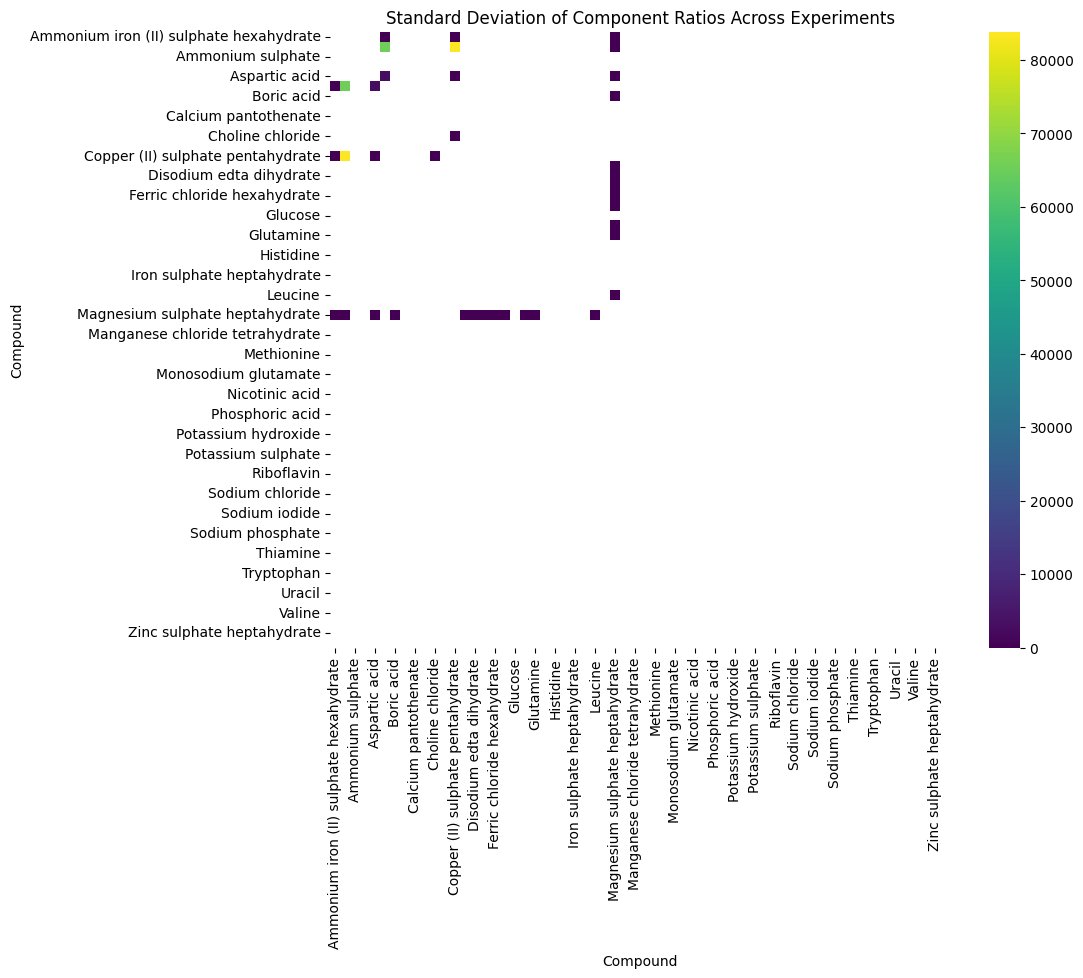

In [66]:
#this is a template to create a heatmap of ratio similarity. It still needs to be adjusted to be useful as many 0 values exists and the labels don't indicate every compound
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to square matrix
ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # symmetric

plt.figure(figsize=(10, 8))
sns.heatmap(ratio_df, cmap="viridis", annot=False)
plt.title("Standard Deviation of Component Ratios Across Experiments")
plt.show()


Below are extras I generated from chatGPT. Generally to try and fix or improve things above

In [67]:
# for making mean = 0; std = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [68]:
# for bringing everything to [0,1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [69]:
import itertools
import numpy as np

ratios = {}
cols = df_t_scaled.columns

for col1, col2 in itertools.combinations(cols, 2):
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = df_t_scaled[col1] / df_t_scaled[col2]
        if ratio.isnull().all() or np.isinf(ratio).all():
            continue
        std_dev = ratio.replace([np.inf, -np.inf], np.nan).dropna().std()
        ratios[(col1, col2)] = std_dev

stable_ratios = sorted(ratios.items(), key=lambda x: x[1])


In [70]:
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")


Ammonium iron (II) sulphate hexahydrate / Ammonium phosphate --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Arginine --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Ammonium sulphate --> std dev: 1.0948
Ammonium iron (II) sulphate hexahydrate / Aspartic acid --> std dev: nan
Ammonium iron (II) sulphate hexahydrate / Calcium pantothenate --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Calcium sulphate dihydrate --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Dipotassium phosphate --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Disodium edta dihydrate --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Ferric chloride hexahydrate --> std dev: 0.0000
Ammonium iron (II) sulphate hexahydrate / Folic acid --> std dev: 0.0000


In [71]:
df_filtered = df_t_scaled.loc[:, (df_t_scaled != 0).any()]


In [72]:
ratio = df_t_scaled[col1] / df_t_scaled[col2]
valid = ratio.replace([np.inf, -np.inf], np.nan).dropna()
if len(valid) >= 5:  # Only trust stable ratios with enough data points
    std_dev = valid.std()


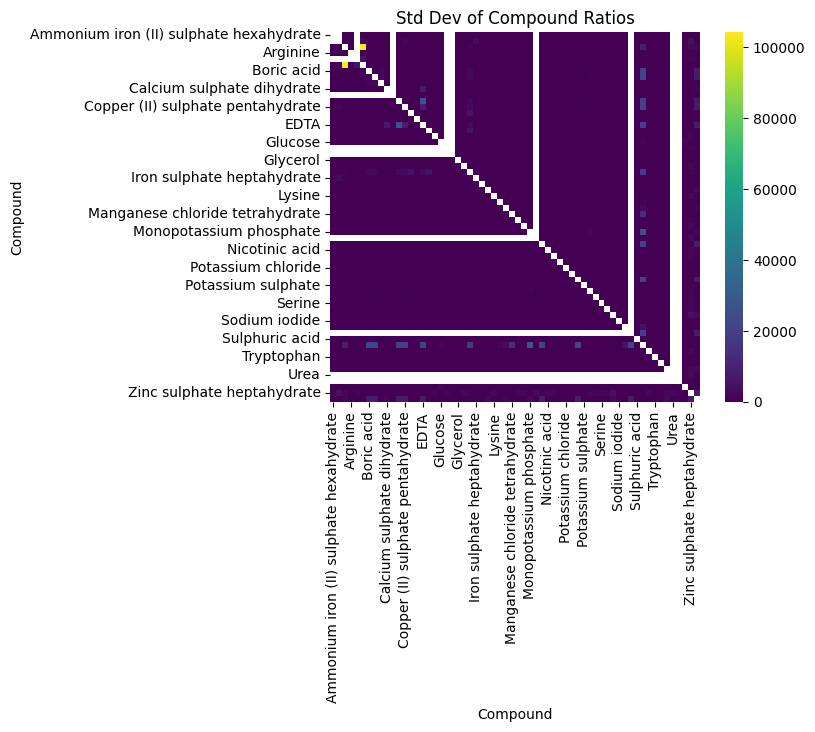

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # fill symmetry

sns.heatmap(ratio_df, cmap="viridis", square=True)
plt.title("Std Dev of Compound Ratios")
plt.show()


In [74]:
compound_names = df_t_scaled.columns
n = len(compound_names)

# Initialize matrix
std_matrix = pd.DataFrame(np.nan, index=compound_names, columns=compound_names)

# Fill it
for i in range(n):
    for j in range(i+1, n):
        c1, c2 = compound_names[i], compound_names[j]
        ratio = df_t_scaled[c1] / df_t_scaled[c2]
        ratio = ratio.replace([np.inf, -np.inf], np.nan).dropna()
        if len(ratio) >= 5:
            std = ratio.std()
            std_matrix.loc[c1, c2] = std
            std_matrix.loc[c2, c1] = std  # symmetry


In [75]:
from sklearn.metrics import pairwise_distances

# Replace NaNs with high values (i.e., very dissimilar)
distance_matrix = std_matrix.fillna(std_matrix.max().max())
# Clip very large outliers if needed
distance_matrix = np.clip(distance_matrix, 0, 10)


In [76]:
from sklearn.cluster import AgglomerativeClustering

# You can adjust number of clusters or set a distance threshold
clustering = AgglomerativeClustering(
    metric='precomputed',
    linkage='average',
    distance_threshold=1.0,  # try tuning this
    n_clusters=None
)

labels = clustering.fit_predict(distance_matrix)

# Assign clusters to compounds
compound_clusters = pd.DataFrame({'Compound': compound_names, 'Cluster': labels})


In [77]:
# View clusters
for cluster_id, group in compound_clusters.groupby("Cluster"):
    print(f"Cluster {cluster_id}:")
    print(group["Compound"].tolist())
    print()

Cluster 0:
['Isoleucine', 'Sodium molybdate dihydrate']

Cluster 1:
['Biotin', 'Calcium chloride dihydrate', 'Cobalt (II) chloride hexahydrate', 'Ferric chloride hexahydrate']

Cluster 2:
['Ammonium iron (II) sulphate hexahydrate', 'Calcium pantothenate', 'Inositol']

Cluster 3:
['Choline chloride', 'Magnesium sulphate heptahydrate', 'Potassium iodide']

Cluster 4:
['Sulphuric acid', 'Zinc sulphate heptahydrate']

Cluster 5:
['Histidine', 'Manganese (II) sulphate monohydrate']

Cluster 6:
['Potassium chloride', 'para-aminobenzoic acid']

Cluster 7:
['Glutamine', 'Iron sulphate heptahydrate', 'Monopotassium phosphate']

Cluster 8:
['Aspartic acid', 'EDTA', 'Potassium hydroxide']

Cluster 9:
['Valine']

Cluster 10:
['Ammonium phosphate', 'Ammonium sulphate']

Cluster 11:
['Threonine']

Cluster 12:
['Zinc chloride']

Cluster 13:
['Sodium iodide', 'Thiamine']

Cluster 14:
['Folic acid', 'Glycerol']

Cluster 15:
['Phosphoric acid', 'Pyridoxine']

Cluster 16:
['Arginine', 'Calcium sulphate d

In [78]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
from scipy.spatial.distance import squareform

# Replace NaNs with large values if not done already
distance_matrix_clean = distance_matrix.fillna(distance_matrix.max().max())
# Force diagonal to 0
np.fill_diagonal(distance_matrix_clean.values, 0)
# Condense
condensed_dist = squareform(distance_matrix_clean.values)


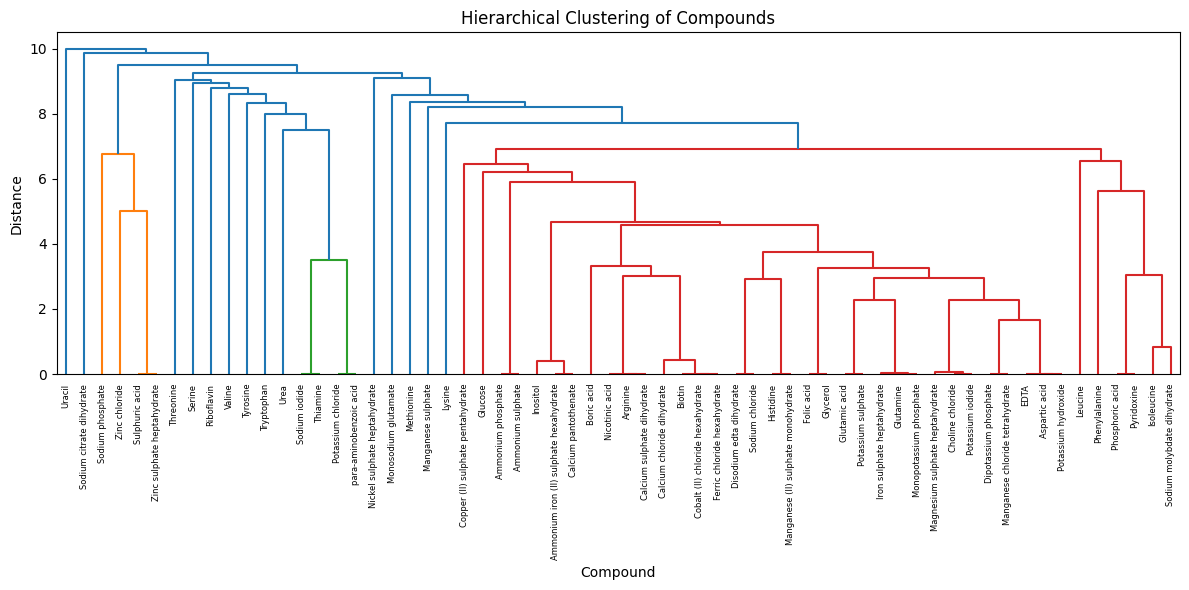

In [80]:
linked = linkage(condensed_dist, method='average')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=distance_matrix_clean.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering of Compounds")
plt.xlabel("Compound")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()
